In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib_venn import venn2

all_strains = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-03-06-DEseq2-analysis/data/all_strains_DEseq.csv", index_col=0)
best_strains = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-03-06-DEseq2-analysis/data/best_strains_DEseq.csv", index_col=0)

In [29]:
all_strains = all_strains.dropna()
all_strains_sign = all_strains[(all_strains.log2FoldChange > 1) | (all_strains.log2FoldChange < -1)]
all_strains_sign.shape

(1245, 6)

In [28]:
best_strains = best_strains.dropna()
best_strains_sign = best_strains[(best_strains.log2FoldChange > 1) | (best_strains.log2FoldChange < -1)]
best_strains_sign.shape

(1209, 6)

In [41]:
venn2([set(all_strains_sign.index), set(best_strains_sign.index)], set_labels = ("all strains", "best strains"), alpha=0.5,
     set_colors= ("b", "y"))

plt.savefig("../figures/venn_DE_genes_all_vs_best.png", dpi=500)

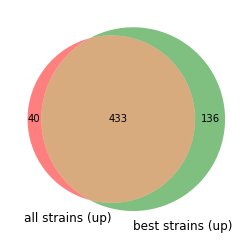

In [46]:
all_up = all_strains[all_strains.log2FoldChange > 1]
best_up = best_strains[best_strains.log2FoldChange > 1] 
venn2([set(all_up.index), set(best_up.index)], set_labels = ("all strains (up)", "best strains (up)"), alpha=0.5,
     set_colors= ("r", "g"))
plt.savefig("../figures/venn_DE_genes_all_vs_best_up.png", dpi=500)
plt.show()

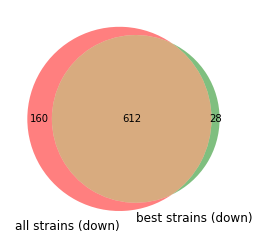

In [47]:
all_down = all_strains[all_strains.log2FoldChange < -1]
best_down = best_strains[best_strains.log2FoldChange < -1] 
venn2([set(all_down.index), set(best_down.index)], set_labels = ("all strains (down)", "best strains (down)"), alpha=0.5,
     set_colors= ("r", "g"))
plt.savefig("../figures/venn_DE_genes_all_vs_best_down.png", dpi=500)
plt.show()

In [67]:
mapped = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-03-06-DEseq2-analysis/data/test.csv",
                    index_col=1)

In [68]:
mapped.index = [i.split(":")[1] for i in mapped.index]
#mapped.columns = ["gene_id"]
mapped["gene_id"] = [c.split(":")[1] for c in list(mapped["Unnamed: 0"])]
mapped.drop(["Unnamed: 0"], axis =1,inplace=True)
mapped.head()

,gene_id
b0001,944742
b0002,945803
b0003,947498
b0004,945198
b0005,944747


In [87]:
best_strains_sign = best_strains[(best_strains.log2FoldChange > 2) | (best_strains.log2FoldChange < -2)]
best_strains_sign.shape
genes_of_interest = best_strains_sign.merge(mapped, left_index=True, right_index=True)
genes_of_interest.set_index(genes_of_interest.gene_id,inplace=True)

In [89]:
genes_of_interest.head()
genes_of_interest.to_csv("../data/best_gene_of_interst_eg.csv")
genes_of_interest.shape

(453, 7)

In [86]:
refGene = best_strains.merge(mapped, left_index=True, right_index=True)
refGene.set_index(refGene.gene_id,inplace=True)
refGene.shape
genes_of_interest.to_csv("../data/best_refGene_eg.csv")

Index(['947498', '945198', '944749', '944745', '944748', '944760', '944792',
       '944771', '944751', '944750', '944753', '944758', '944757', '944759',
       '949129', '944761', '944800', '944807', '944777', '944796', '944762',
       '949025', '944775', '944795', '948999', '948995', '948997', '949064',
       '944765', '947316', '948939', '944766', '944767', '944773', '944790',
       '944770', '944772', '944939', '944919', '944812', '945011', '948992',
       '946262', '948523', '944779', '945294', '947511', '946017', '944783',
       '944785', '944784', '946306', '944788', '945642', '945076', '944798',
       '947465', '949034', '948793', '947267', '944804', '944810', '944806',
       '944803', '944799', '944791', '944813', '944818', '946322', '946321',
       '946153', '946324', '944823', '944778', '944786', '944816', '944831',
       '944821', '944824', '945630', '944873', '949060', '948986', '947481',
       '945817', '948869', '948877', '946678', '944827', '944834', '944794',